In [35]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Reading csv file
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Checking for null values
df.isnull().values.sum()

0

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df=df.rename(columns={'Genre': "Gender"})

In [13]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


UNIVARIATE ANALYSIS

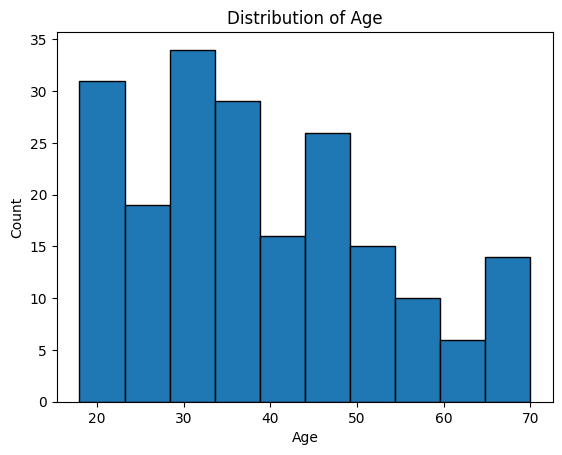

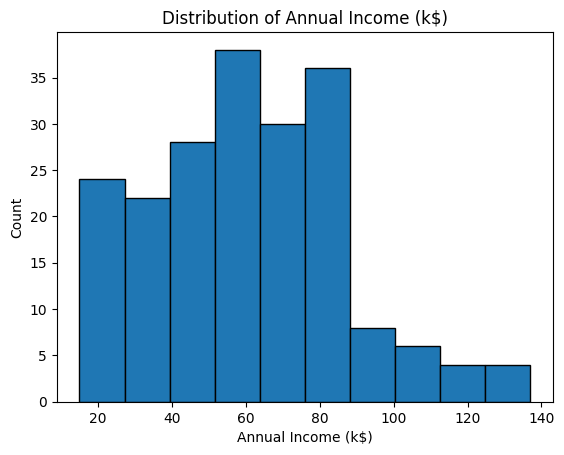

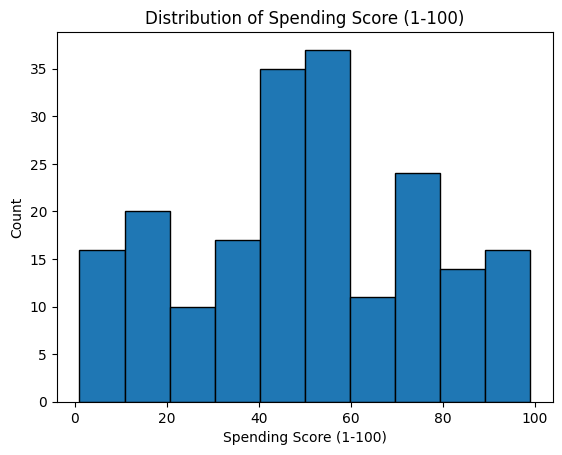

In [15]:
columns = df.columns[2:]
for column in columns:
    plt.hist(df[column], bins=10, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

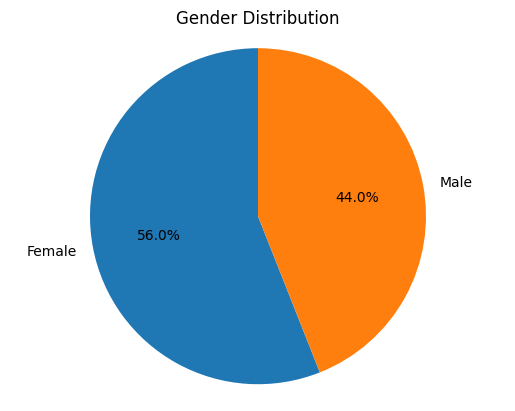

In [19]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

BIVARIATE ANALYSIS

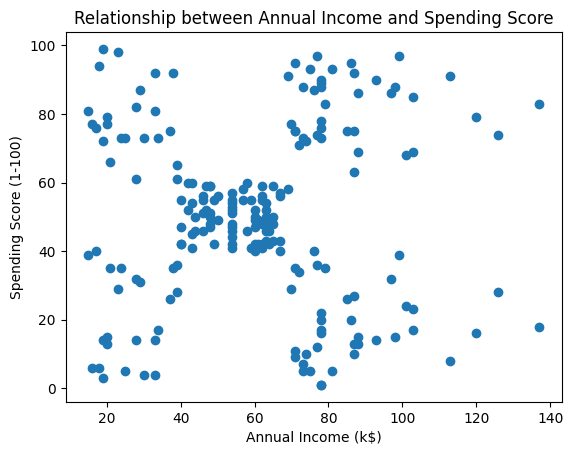

In [20]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
plt.scatter(x, y)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Annual Income and Spending Score')
plt.show()

In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


HEATMAP

<ipython-input-26-10f4335764d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap=cmap)


<Axes: >

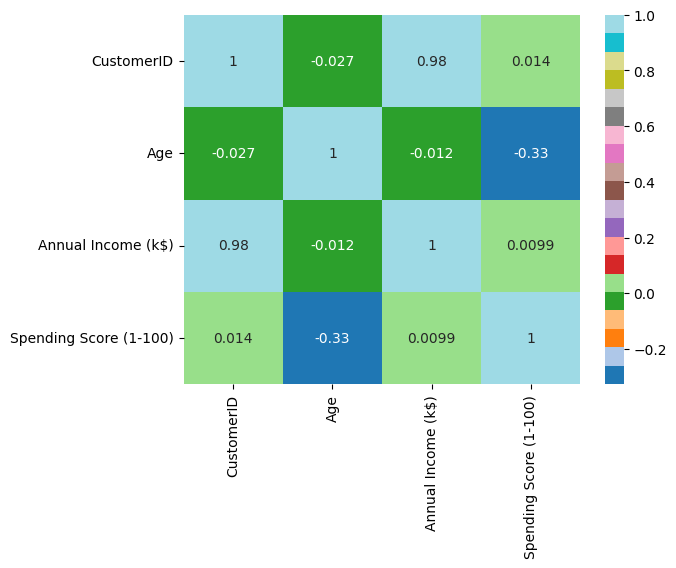

In [26]:
cmap = "tab20"
sns.heatmap(df.corr(),annot=True,cmap=cmap)

In [31]:
#One hot encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [32]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [104]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Gender', 'Spending Score (1-100)']
df1 = scaler.fit_transform(df[numerical_cols])

K means Clustering for Segmentation

Elbow method is used for finding the optimal value of k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

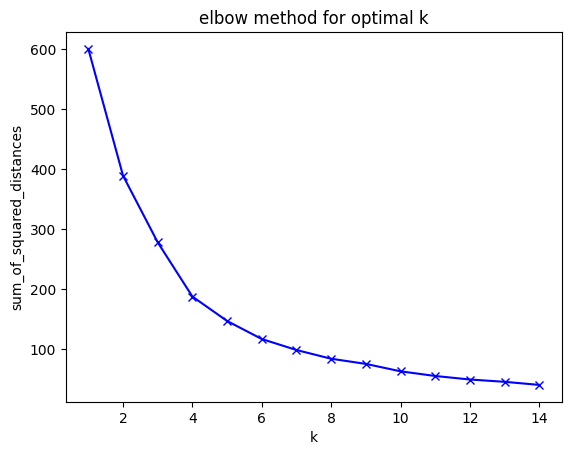

In [105]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(df1)
    sum_of_squared_distances.append(k_means.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

We see that optimal value for k is 7

In [111]:
from sklearn import metrics
k_means_3 = KMeans(n_clusters=7)
#Run the clustering algorithm
model = k_means.fit(df1)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(df1)
labels = k_means.labels_
metrics.silhouette_score(df1, labels, metric = 'euclidean')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.4655400661657847

In [118]:
n_clusters = 7 # Number of desired clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df1)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [119]:
avg_df = df.groupby(['Cluster'], as_index=False).mean()
avg_df.head()

,Cluster,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,85.741935,1.128152,1.351182,-0.243004,-0.493660
1,1,83.000000,-0.886405,-0.807907,-0.292802,-0.196121
2,2,105.641026,1.128152,-0.703222,0.096070,0.873186
3,3,83.923077,-0.886405,1.098306,-0.241583,-0.048079
4,4,109.588235,-0.886405,-0.662575,0.092011,1.204839


In [120]:
df2 = pd.DataFrame(df.groupby(['Cluster','Gender'])['Gender'].count())
df2

,,Gender
Cluster,Gender,
0,1.128152,31
1,-0.886405,27
2,1.128152,39
3,-0.886405,26
4,-0.886405,34
5,1.128152,18
6,-0.886405,25


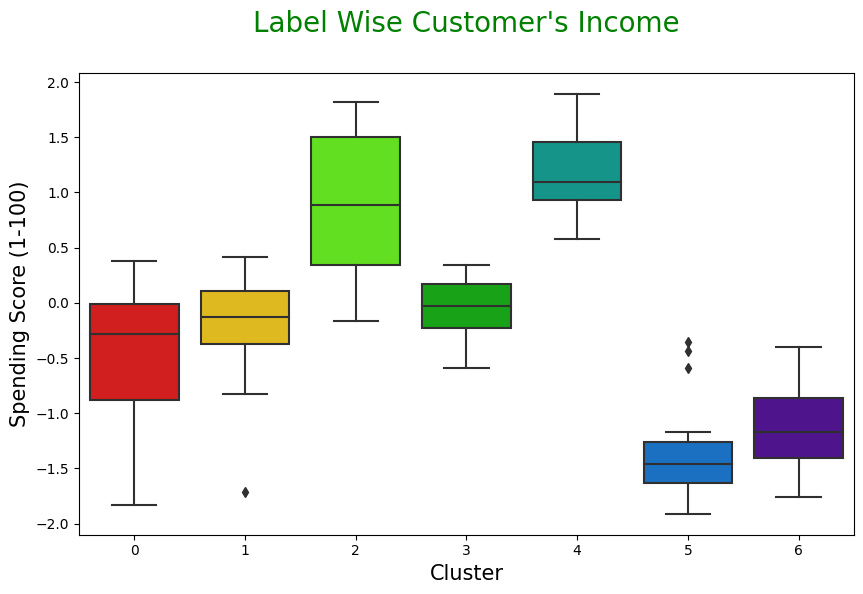

In [121]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n", fontsize=20, color="green")
plt.xlabel(xlabel="Cluster", fontsize=15)
plt.ylabel(ylabel="Spending Score (1-100)",fontsize=15)
plt.show()